<a href="https://colab.research.google.com/github/asai2094/ds4002/blob/main/ds4002project2firstrun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install keras.layers.core

ERROR: Could not find a version that satisfies the requirement keras.layers.core (from versions: none)
ERROR: No matching distribution found for keras.layers.core


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import os
import requests
import zipfile
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from io import BytesIO

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.utils import to_categorical
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import cv2
import random
from numpy import *

In [ ]:
# Path to the zip file
fungi_path = "/content/drive/MyDrive/ds4002/defungi.zip"

# Directory where contents are extracted
fungi_output = "/content/drive/MyDrive/ds4002"

# Unzipping the file
with zipfile.ZipFile(fungi_path, 'r') as zip_ref:
    zip_ref.extractall(fungi_output)

# Listing the 5 subdirectories in the extracted folder
classes = [os.path.join(fungi_output, o) for o in os.listdir(fungi_output)
           if os.path.isdir(os.path.join(fungi_output,o))]

# Initialize a DataFrame to store image data
image_data = pd.DataFrame()

# Loop through each class folder to extract image paths and labels
for class_path in classes:
    class_name = os.path.basename(class_path)
    images = [os.path.join(class_path, f) for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    data = pd.DataFrame({'path': images, 'label': class_name})
    image_data = pd.concat([image_data, data], ignore_index=True)

# Display the last few rows of the data frame
print(image_data.tail())

# Function to get the dimensions of the data
def get_image_dimensions(image_path):
    with Image.open(image_path) as img:
        return img.size  # returns a tuple (width, height)

# Add dimensions to each image in DataFrame
image_data['dimensions'] = image_data['path'].apply(get_image_dimensions)

# Convert the dimensions column to a more readable format
image_data['dimensions'] = image_data['dimensions'].apply(lambda d: f"{d[0]}x{d[1]}")

# Now, the dimensions column will have entries like 'width x height'
print(image_data.head())
print(image_data.tail())

                                              path label
9109  /content/drive/MyDrive/ds4002/H6/H6_9a_2.jpg    H6
9110  /content/drive/MyDrive/ds4002/H6/H6_9a_3.jpg    H6
9111  /content/drive/MyDrive/ds4002/H6/H6_9a_4.jpg    H6
9112  /content/drive/MyDrive/ds4002/H6/H6_9a_5.jpg    H6
9113  /content/drive/MyDrive/ds4002/H6/H6_9a_6.jpg    H6
                                             path label dimensions
0  /content/drive/MyDrive/ds4002/H1/H1_100a_1.jpg    H1    500x500
1  /content/drive/MyDrive/ds4002/H1/H1_100a_2.jpg    H1    500x500
2  /content/drive/MyDrive/ds4002/H1/H1_100a_3.jpg    H1    500x500
3  /content/drive/MyDrive/ds4002/H1/H1_100a_4.jpg    H1    500x500
4  /content/drive/MyDrive/ds4002/H1/H1_100a_5.jpg    H1    500x500
                                              path label dimensions
9109  /content/drive/MyDrive/ds4002/H6/H6_9a_2.jpg    H6    500x500
9110  /content/drive/MyDrive/ds4002/H6/H6_9a_3.jpg    H6    500x500
9111  /content/drive/MyDrive/ds4002/H6/H6_9a_4.jpg  

  label  count  proportion
0    H1   4404    0.483213
1    H2   2334    0.256090
2    H3    819    0.089862
3    H5    818    0.089752
4    H6    739    0.081084


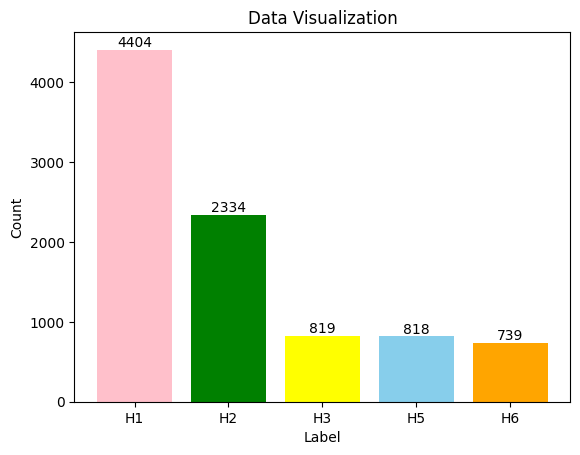

In [ ]:
#preliminary EDA
grouped = image_data.groupby('label').size().reset_index(name='count')
grouped['proportion'] = grouped['count'] / grouped['count'].sum()

print(grouped)

#making a graph for EDA
colors = ['pink', 'green', 'yellow', 'skyblue', 'orange']
graph = plt.bar(grouped['label'], grouped['count'], color = colors)
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Data Visualization")

for bar in graph:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')


plt.show()

In [ ]:
#initializing CNN and adding a convolutional layer
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(500,500,3))) #3 is for RGB
#doing a Pooling operation to downsample our image
model.add(MaxPooling2D(pool_size=2)) #we are choosing to do MaxPooling. This also helps our model pick up on variation!
#adding 2 more convolutional layers
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2)) #notice how we are pooling everytime
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2)) #with filter numbers 32 and 64
#flattening operation
model.add(Flatten())
#now we are taking our flattened info and will then use it to build the artificial neural network
model.add(Dense(500,activation="relu"))
model.add(Dense(5,activation="softmax")) #using Keras to do this. softmax is used to take our outputs of neural network and build probabilities of each possible outcome in our classes

##now our basic model is done. let us compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

X = image_data['path']
y = image_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 20% data as test set

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# creating our train and test data
datagen = ImageDataGenerator(rescale=1./255)
train_df = pd.DataFrame({'path': X_train, 'label': y_train})
test_df = pd.DataFrame({'path': X_test, 'label': y_test})


train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='path',
    y_col='label',
    target_size=(500, 500),  # Adjust as needed
    batch_size=32,          # Adjust as needed
    class_mode='categorical')

test_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='path',
    y_col='label',
    target_size=(500, 500),  # Adjust as needed
    batch_size=32,          # Adjust as needed
    class_mode='categorical')
r = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    steps_per_epoch=len(train_generator),
    validation_steps=len(test_generator)
)

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


Found 7291 validated image filenames belonging to 5 classes.
Found 1823 validated image filenames belonging to 5 classes.
Epoch 1/10
 10/228 [>.............................] - ETA: 1:11 - loss: 21.1994 - accuracy: 0.2906

KeyboardInterrupt: 